# K邻近 kNN
## 算法实现 implementation of algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

### 数据集 Dataset

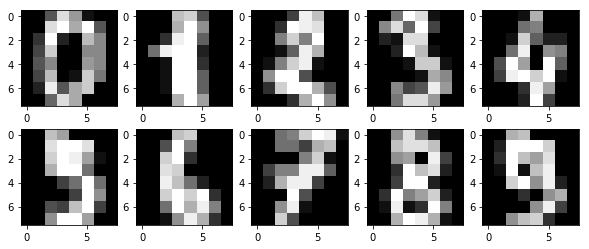

In [2]:
digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

fig = plt.figure(figsize=(10,4))
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1)
    plt.imshow(X[i].reshape((8,8)), cmap='gray')
    
plt.show()

In [3]:
class kNN():
    def __init__(self):
        pass

    def fit(self, X_train, y_train):
        self.data = X_train
        self.targets = y_train

    def euclidean_distance(self, X):
        n_samples, n_features = X.shape
        l2 = [np.sqrt(np.sum((self.data - X[i])**2, axis=1)) for i in range(n_samples)]
        return np.array(l2)

    def predict(self, X_test, k=1):
        dists = self.euclidean_distance(X_test)
        knn = np.argsort(dists)[:, :k]
        y_knn = self.targets[knn]
        if k == 1:
            return y_knn.T
        else:
            n_samples, n_features = X_test.shape
            max_votes = [max(y_knn[i], key=list(y_knn[i]).count) for i in range(n_samples)]
            return max_votes
        
    def score(self, X_test, y_test, k=1):
        y_p = self.predict(X_test, k)
        return np.mean(np.where(y_p == y_test, 1, 0))

### 测试 Testing

In [4]:
clf = kNN()
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.9866666666666667

## scikit-learn

In [5]:
from sklearn.neighbors import KNeighborsClassifier

In [6]:
n_clf = KNeighborsClassifier(n_neighbors=1)
n_clf.fit(X_train,y_train)
n_clf.score(X_test,y_test)

0.9866666666666667